# Loading the parquet file

- before running this notebook please:
- please use the flight_data.py file to generate a csv file for your analysis 
 

## Imports

In [1]:
import pandas as pd ,matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import os
pd.set_option("display.max_columns", 999)

In [2]:
# loaded at the end
df = pd.read_csv('final_data_2m.csv')

In [3]:
# Step 1: Clean and split airline names
df['segmentsAirlineName'] = df['segmentsAirlineName'].str.replace(r'\s*\|\|\s*', '||', regex=True)

In [4]:
data_dictionary = dict( legId = "An identifier for the flight.",
      searchDate= "The date (YYYY-MM-DD) on which this entry was taken from Expedia.",
      flightDate= "The date (YYYY-MM-DD) of the flight.",
      startingAirport= "Three-character IATA airport code for the initial location.",
      destinationAirport= "Three-character IATA airport code for the arrival location.",
      fareBasisCode= "The fare basis code.",
      travelDuration= "The travel duration in hours and minutes.",
      elapsedDays= "The number of elapsed days (usually 0).",
      isBasicEconomy= "Boolean for whether the ticket is for basic economy.",
      isRefundable= "Boolean for whether the ticket is refundable.",
      isNonStop=" Boolean for whether the flight is non-stop.",
      baseFare= "The price of the ticket (in USD).",
      totalFare= "The price of the ticket (in USD) including taxes and other fees.",
      seatsRemaining=" Integer for the number of seats remaining.",
      totalTravelDistance= "The total travel distance in miles. This data is sometimes missing.",
      segmentsDepartureTimeEpochSeconds= "String containing the departure time (Unix time) for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsDepartureTimeRaw= "String containing the departure time (ISO 8601 format: YYYY-MM-DDThh:mm:ss.000±[hh]:00) for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsArrivalTimeEpochSeconds= "String containing the arrival time (Unix time) for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsArrivalTimeRaw= "String containing the arrival time (ISO 8601 format: YYYY-MM-DDThh:mm:ss.000±[hh]:00) for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsArrivalAirportCode= "String containing the IATA airport code for the arrival location for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsDepartureAirportCode= "String containing the IATA airport code for the departure location for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsAirlineName= "String containing the name of the airline that services each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsAirlineCode= "String containing the two-letter airline code that services each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsEquipmentDescription= "String containing the type of airplane used for each leg of the trip (e.g. \"Airbus A321\" or \"Boeing 737-800\"). The entries for each of the legs are separated by '||'.",
      segmentsDurationInSeconds= "String containing the duration of the flight (in seconds) for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsDistance= "String containing the distance traveled (in miles) for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsCabinCode= "String containing the cabin for each leg of the trip (e.g. \"coach\"). The entries for each of the legs are separated by '||'.")

#### drop the null values

In [5]:
df.isna().sum()[:20]

legId                                     0
searchDate                                0
flightDate                                0
startingAirport                           0
destinationAirport                        0
fareBasisCode                             0
travelDuration                            0
elapsedDays                               0
isBasicEconomy                            0
isRefundable                              0
isNonStop                                 0
baseFare                                  0
totalFare                                 0
seatsRemaining                            0
totalTravelDistance                  121198
segmentsDepartureTimeEpochSeconds         0
segmentsDepartureTimeRaw                  0
segmentsArrivalTimeEpochSeconds           0
segmentsArrivalTimeRaw                    0
segmentsArrivalAirportCode                0
dtype: int64

In [6]:
df.isna().sum()[20:] 


segmentsDepartureAirportCode        0
segmentsAirlineName                 0
segmentsAirlineCode                 0
segmentsEquipmentDescription    37728
segmentsDurationInSeconds           0
segmentsDistance                15337
segmentsCabinCode                   0
dtype: int64

In [7]:
# drop null values
df.dropna(subset=['segmentsEquipmentDescription', 'segmentsDistance'], inplace=True)

In [8]:
def calculate_total_traveled_distance(segment_distance_list):
  vals = segment_distance_list.split('||')
  # i.isdigit() is a str method in python
  valid_values = [ i for i in vals if i and i.isdigit()]
  return sum(map(int,valid_values))

In [9]:
df['total_distance'] = df['segmentsDistance'].apply(calculate_total_traveled_distance) #.apply() runs in C-optimized pandas code. inshort python is slow, C is very fast

In [10]:
df = df.drop(['totalTravelDistance'], axis=1)

In [11]:
# df.rename(columns={'old_column_name': 'new_column_name'})

df = df.rename(columns={'total_distance': 'totalTravelDistance'})

#### Most used airports

- what is the most used airport for arrivals ? 
- what is the most used airport for departures ? 
- what is the most used airport for both cases ? 

In [12]:
arrival_airports = df['segmentsArrivalAirportCode'].str.split(r'\|\|').explode()
arrival_airport_count = arrival_airports.value_counts()

In [13]:
departure_airports = df['segmentsDepartureAirportCode'].str.split(r'\|\|').explode()
departure_airport_count = departure_airports.value_counts()

In [14]:
airport_count = pd.concat([arrival_airport_count,departure_airport_count], axis=1)
airport_count.columns = ['arrival_airport_count','departure_airport_count']

In [15]:
airport_count['total'] = airport_count['arrival_airport_count'] +  airport_count['departure_airport_count']

In [16]:
airport_count.head(5)

,arrival_airport_count,departure_airport_count,total
ORD,289223,287757,576980
ATL,269600,262723,532323
CLT,232016,227715,459731
LAX,221879,225488,447367
EWR,194117,193932,388049


In [53]:
print('')

# Flight Ticket Analysis (US version)

<img src='./ar.png' width=300 height=300>

<img src='./82.png' width=300 height=300>

# Most used Airports in the US

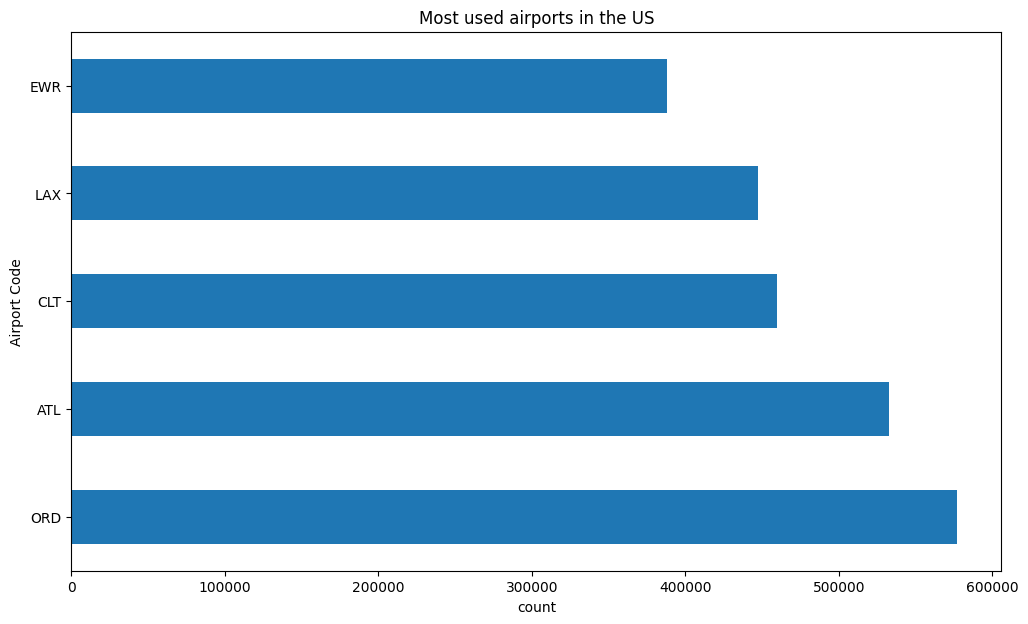

In [17]:

plt.figure(figsize=(12,7))
airport_count['total'].head().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Airport Code')
plt.title('Most used airports in the US')

# Define the directory and file path
folder = "Graphs"
file_path = os.path.join(folder, "most-used-airports.png")

# Create the directory if it does not exist
os.makedirs(folder, exist_ok=True)

plt.savefig(file_path, dpi=300, bbox_inches="tight")

#### `how many multi-leg flights are there in the dataset ? `
- what is the most used connection ? ` HERE 😍`
- how many travelers use a multi-leg flight ?  `use a histogram`
- are multi-leg flights cheaper  ?  `use a histogram`

In [18]:
# count the number of multi-leg flights
filter = df['segmentsArrivalAirportCode'].str.contains(r'\|\|', na=False) # what is na= ? 

In [19]:
number_multi_leg_flights = len(df[filter][['segmentsArrivalAirportCode','segmentsDepartureAirportCode']]) # output = 1,430,064 rows

In [20]:
print(f' The number of multi-leg flights currently {number_multi_leg_flights}')

 The number of multi-leg flights currently 1430064


### Identify Common Connections in Multi-Leg Flights

- by the common connection i am searching here for something like: `LGA --> ORD`
- So by a common connection we are refering for something like departure:
1. Departure Column -> `ATL||CMH`	
2. Arrival Column -> `CMH||DTW`

what i am trying to see is from the Departure Column `ATL` and from the Arrival Column `CMH` to see which connections from 1 place to another place is being used the most.

In [21]:
df[['segmentsDepartureAirportCode','segmentsArrivalAirportCode']]

,segmentsDepartureAirportCode,segmentsArrivalAirportCode
0,ATL,BOS
1,ATL,BOS
2,ATL,BOS
3,ATL,BOS
4,ATL,BOS
...,...,...
1999995,ATL||CMH,CMH||DTW
1999996,ATL||CHA,CHA||DTW
1999997,ATL||ORF,ORF||DTW
1999998,ATL,EWR


In [22]:
# Extract the first departure and arrival airport codes
# taking the first column from the list as explained above
df['departure'] = df['segmentsDepartureAirportCode'].str.split(r'\|\|', expand=True)[0] 
df['arrival'] = df['segmentsArrivalAirportCode'].str.split(r'\|\|', expand=True)[0] # the 1st item in the 'list' <- easier to think of it as a list



In [23]:
# Create a "route" column
df['route'] = df['departure'] + "->" + df['arrival']

In [24]:
# 'value_counts()' returns a dataframe with the column name and the count of each distinct element in the column

df['route'].value_counts().reset_index()

,route,count
0,LGA->ORD,31230
1,OAK->LAX,26207
2,BOS->EWR,24519
3,MIA->ATL,24067
4,PHL->ORD,23474
...,...,...
1041,CLT->GRR,1
1042,CLT->ABE,1
1043,SFO->BNA,1
1044,EWR->STL,1


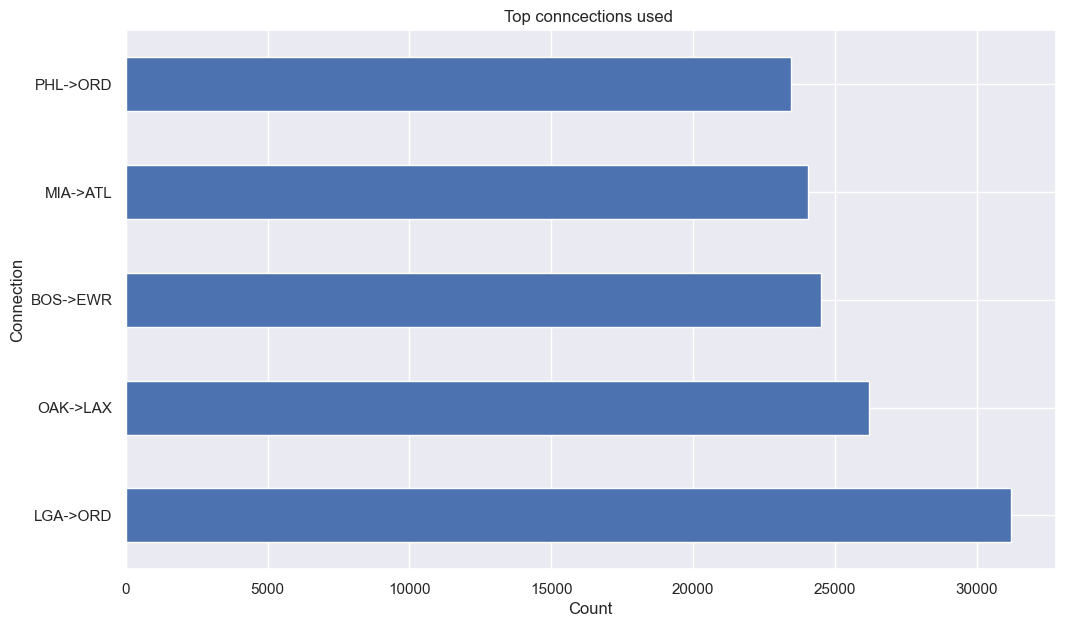

In [25]:


sns.set_theme()
plt.figure(figsize=(12,7))
plt.title("Top conncections used ")
df['route'].value_counts().head(5).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Connection')


# Define the directory and file path
folder = "Graphs"
file_path = os.path.join(folder, "Top-connections-used-firstStop.png")

# Create the directory if it does not exist
os.makedirs(folder, exist_ok=True)

plt.savefig(file_path, dpi=300, bbox_inches="tight")


## THE MOST COMMON CONNECTION IS LGA->ORD WHICH IS ?

`LaGuardia Airport (LGA) in New York City to O’Hare International Airport (ORD) in Chicago.`

these are the most popular route as start to departure, `but it may be just a transit`

i would like to know the most popular route as start to finish ☕️😆

## Question: where people in the US usually fly to ? `as in starting point to END Destination`

In [26]:
start_location =  df['segmentsDepartureAirportCode'].str.split(r'\|\|', expand=True)[0] 

# this function gets a list passed into it, then this list is processed
def get_final_destination(x):
  final = ''
  for i in x: 
    if i != None: 
      final = i
      
  return final

end_location = df['segmentsArrivalAirportCode'].str.split(r'\|\|').apply(get_final_destination)

df['start_END_Destination'] = start_location + '->' + end_location

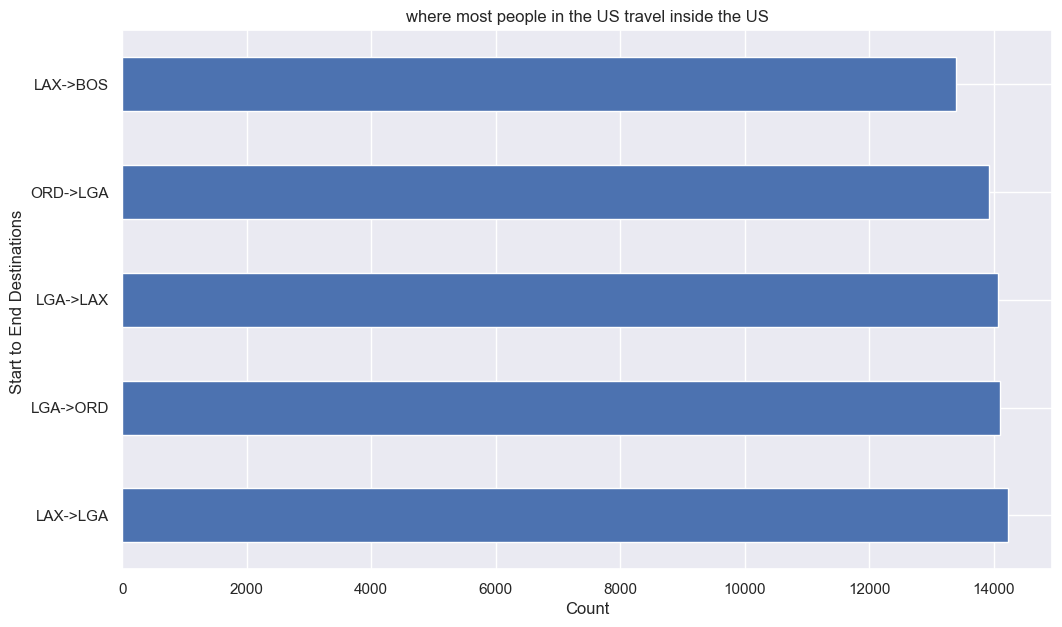

In [27]:

plt.figure(figsize=(12,7))
route_counts = df['start_END_Destination'].value_counts()
route_counts.head().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Start to End Destinations ")
plt.title('where most people in the US travel inside the US')

# Define the directory and file path
folder = "Graphs"
file_path = os.path.join(folder, "most-travelled-to-in-US.png")

# Create the directory if it does not exist
os.makedirs(folder, exist_ok=True)

plt.savefig(file_path, dpi=300, bbox_inches="tight")

Now we have the count of each full route for all the airplane tickets, where we can see the `start` and the `end` destination. 

## Question: does the amount of departures affect the final totalFare of the ticket ? 

### Sub-Question: 
- what does most people prefer ? `direct tickets ?` | `Single Stop tickets` | `More than 1 stop tickets`
- which one contains the cheapest fares ? 
- what is better ? travelling using the direct ticket or 2 departures or 3+ departures ? 

      - tell them about the min price of each type, why the minimum of the 2 departures is higher than the minimum of a single departure ? while the max tells another story ? 


In [28]:
# i want to catch the flights where the departure segment contains something like 
# Filter rows where column 0 contains at least two "->" separators
# three_or_more_departures_df = df[df['full_route'].str.contains(r'[^ ]+ -> [^ ]+ -> ', regex=True)]
three_or_more_departures_df = df[df['segmentsDepartureAirportCode'].str.contains(r"^[A-Z]{3}\|\|[A-Z]{3}\|\|", regex=True)]

print(f' Tickets with at least 3 departures          {three_or_more_departures_df.shape[0]}')
print(f' The Size of the original dataframe          {df.shape[0]}')



 Tickets with at least 3 departures          144024
 The Size of the original dataframe          1952077


In [29]:
df.startingAirport.unique() # 16 airport codes that are unique and they are all in the US

array(['ATL', 'BOS', 'CLT', 'DEN', 'DFW', 'DTW', 'EWR', 'IAD', 'JFK',
       'LAX', 'LGA', 'MIA', 'OAK', 'ORD', 'PHL', 'SFO'], dtype=object)

In [30]:
arrival_airports = 'segmentsArrivalAirportCode'	
departure_airports = 'segmentsDepartureAirportCode'

# i want tickets which exactly have 2 departures
two_departure_df = df[
    df[departure_airports].str.contains(r"^[A-Z]{3}\|\|[A-Z]{3}$", regex=True)
]

In [31]:
# i want tickets which exactly have 1 departure
nonStop_tickets = df[
    df[departure_airports].str.contains(r"^[A-Z]{3}$", regex=True)
]

In [32]:
two_departure_df.shape[0],three_or_more_departures_df.shape[0],nonStop_tickets.shape[0],df.shape[0]

(1286040, 144024, 522013, 1952077)

In [33]:

nonStop_tickets.shape[0]+ two_departure_df.shape[0] + three_or_more_departures_df.shape[0] == df.shape[0] # correct values, no df contains data from others. so all are pure correct 😍

True

# `Now to the Question everyone is waiting for`, does having more Departures affects the total fare ? and  most people prefer flying through what ? 

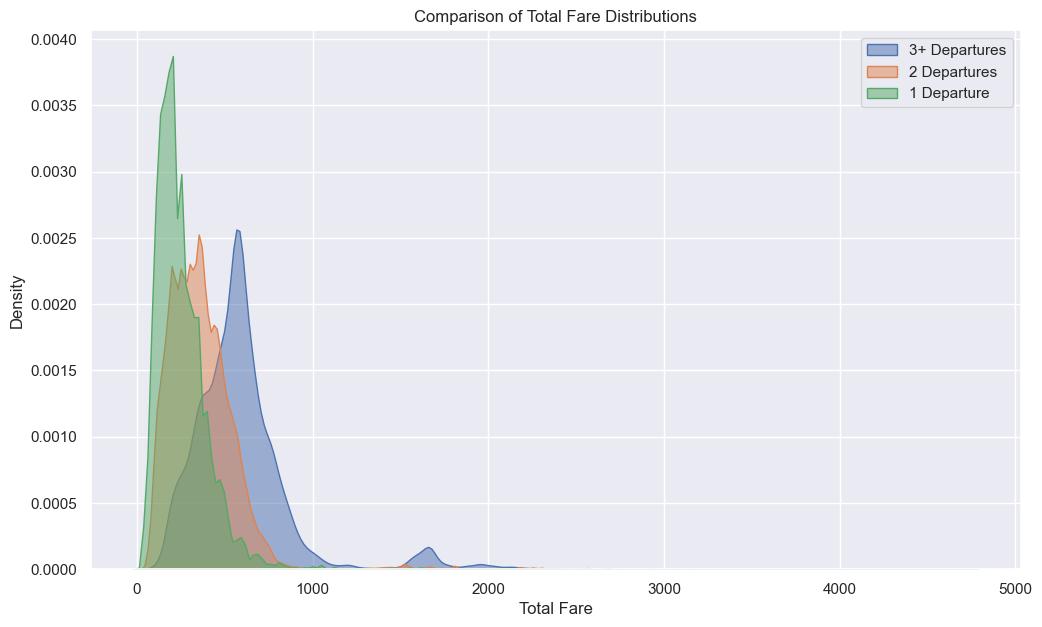

In [34]:


plt.figure(figsize=(12, 7))
sns.kdeplot(three_or_more_departures_df.totalFare, label='3+ Departures', fill=True, alpha=0.5)
sns.kdeplot(two_departure_df.totalFare, label='2 Departures', fill=True, alpha=0.5)
sns.kdeplot(nonStop_tickets.totalFare, label='1 Departure', fill=True, alpha=0.5)

plt.xlabel('Total Fare')
plt.ylabel('Density')
plt.title('Comparison of Total Fare Distributions')
plt.legend()


# Define the directory and file path
folder = "Graphs"
file_path = os.path.join(folder, "kdp-totalfare.png")

# Create the directory if it does not exist
os.makedirs(folder, exist_ok=True)

plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()





 very cool graph, it is working nicely



 - the green part shows that the 1 departure tickets are cheaper and `most people prefer them`
 - the orange part shows that the 2 departure tickets are still preferred, they are a little bit pricier than the 1 departure, but it still `people prefer them`



 this graph is basically not showing the raw data exactly, they are being normalized (using windows - these windows can be using different methods such as {median, min, max, mean}) or just a simple method that is like dividing the `count/total count`.

histograms are more accurate because we can play with the bins which help us get more insights much easier and faster

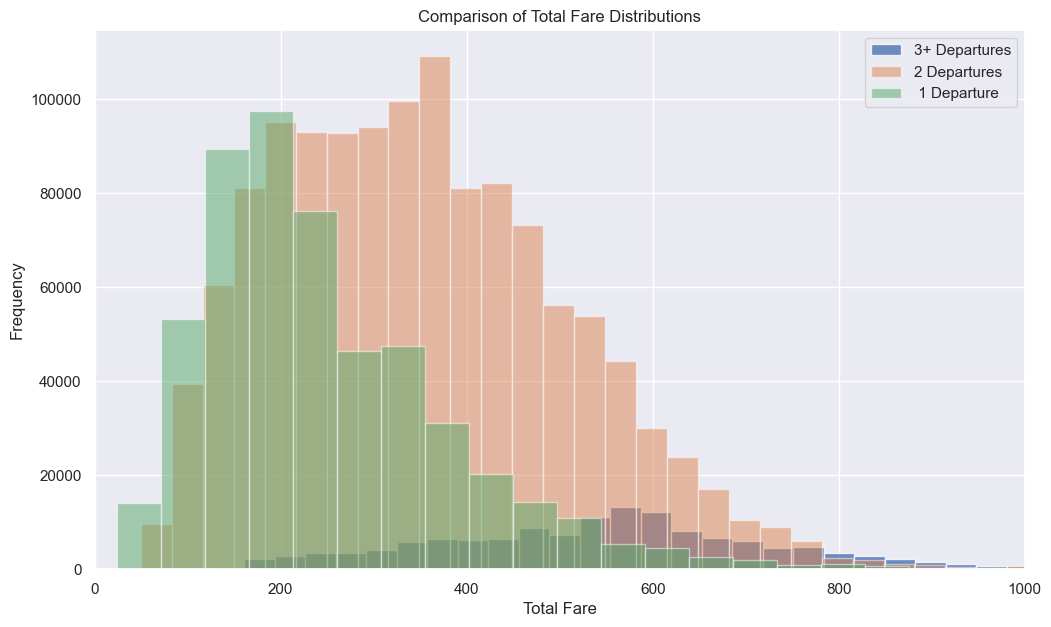

In [57]:


# Plot histograms together
plt.figure(figsize=(12, 7))
three_or_more_departures_df.totalFare.hist(alpha=0.8, label='3+ Departures', bins=100)
two_departure_df.totalFare.hist(alpha=0.5, label='2 Departures', bins=100)
nonStop_tickets.totalFare.hist(alpha=0.5, label=' 1 Departure', bins=100)


# Add labels and title
plt.xlabel('Total Fare')
plt.ylabel('Frequency')
plt.title('Comparison of Total Fare Distributions')
plt.xlim((0,1000))
plt.legend()


# Define the directory and file path
folder = "Graphs"
file_path = os.path.join(folder, "hist-totalfare.png")

# Create the directory if it does not exist
os.makedirs(folder, exist_ok=True)

plt.savefig(file_path, dpi=300, bbox_inches="tight")


# Show the plot
plt.show()

#### Summary - of the Graph



 - ### the green part shows that the 1 departure tickets contains cheaper tickets and `people prefer flying using 1 departure only`
 - ### the orange part shows that the 2 departure tickets are the most favored one, but they are a little bit pricier than the 1 departure
 - ### the blue part is the least preffered option from the 3 options, and they contain the most expensive tickets


### Comparing the Mean of different departures to Understand the data

In [36]:


f = nonStop_tickets['start_END_Destination'] == 'ORD->LGA'

one = nonStop_tickets[f]['totalFare'].mean().item()


f = two_departure_df['start_END_Destination'] == 'ORD->LGA'

two = two_departure_df[f]['totalFare'].mean().item()


three_or_more_departures_df


f = three_or_more_departures_df['start_END_Destination'] == 'ORD->LGA'

three_etc = three_or_more_departures_df[f]['totalFare'].mean().item()


print(f"""
      
      1-Departure Median = ${one:.2f}
      
      2-Depature Median = ${two:.2f}
      
      3 or more departures Median = ${three_etc:.2f}
      """)




      
      1-Departure Median = $177.65
      
      2-Depature Median = $176.20
      
      3 or more departures Median = $493.34
      



<b>This Means that the tickets of the 1-depatures and 2-departures are nearly the same
while the 3-depatures will cost a bit more if you want to start travelling from `ORD->LGA`</b>


### Let's take a look at the data in-depth 

In [37]:
# the whole dataset

float(df.totalFare.min()), float(df.totalFare.max()) 

(23.97, 4752.6)

In [38]:
# 1 - departure tickets

float(nonStop_tickets.totalFare.min()),float(nonStop_tickets.totalFare.max())

(23.97, 4752.6)

In [39]:
# 2-depature tickets

float(two_departure_df.totalFare.min()),float(two_departure_df.totalFare.max())

(49.69, 3376.6)

In [40]:
# 3-depature tickets

float(three_or_more_departures_df.totalFare.min()),float(three_or_more_departures_df.totalFare.max())

(62.38, 3341.09)

what can we learn from the max and the min here ? 
- the max values suggest our first intiuition which is as the number of stops increase, the price gets lower and we can sense this by looking at the maximum value of each filter we used
the min tells us a different story:

<li> for MIN prices we can see the following:
  <ul> 
    <li> one-way-tickets min : 23.97</li>
    <li> two-way-tickets min : 49.69</li>
    <li> at least three-way-tickets min : 62.38 </li>
  </ul>     
</li>

`CONCLUSION: for short travels in terms of distance, travel one way`

<li> for MAX prices we can see the following:
  <ul> 
    <li> one-way-tickets MAX : 4752.6</li>
    <li> two-way-tickets MAX : 3376.6</li>
    <li> at least three-way-tickets MAX : 3341.09 </li>
  </ul>
</li>

`CONCLUSION: for long travels in terms of distance, travel three way - considering other factors equal -- ceteris paribus`




things i want to see: 
- the airplane tickets are they round trip ? 
- all of these are one tickets right ? 
- so one way tickets but some have some stops in between which makes the ticket cheaper or expensive in some cases.

#### `Most used airlines ? `

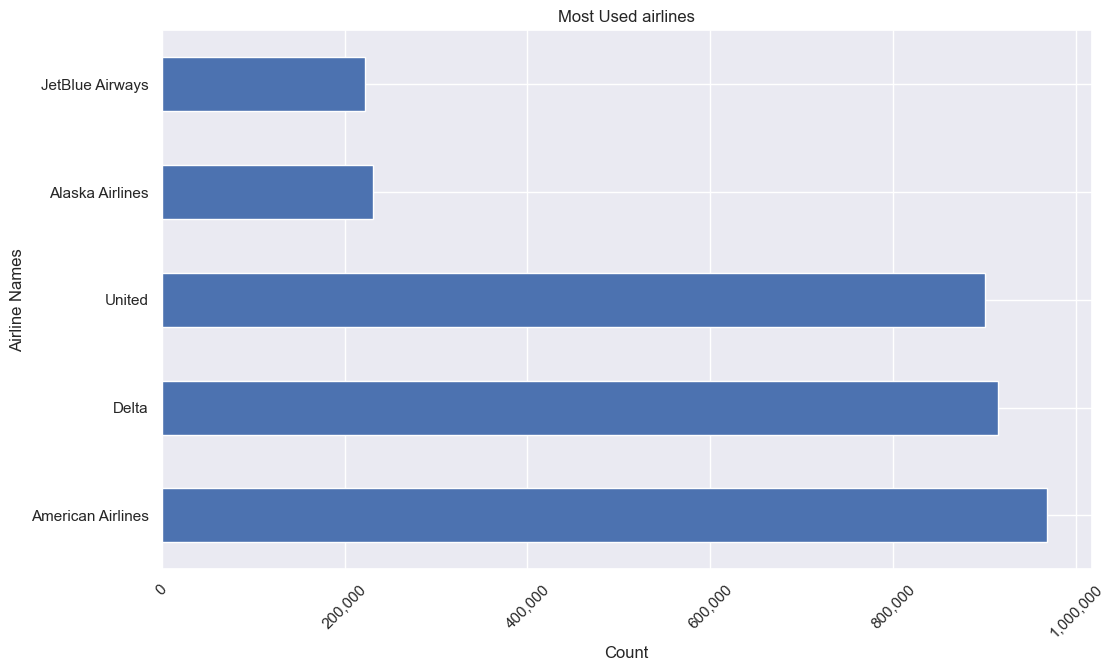

In [41]:


sns.set_theme()
plt.figure(figsize=(12,7))
ax = df['segmentsAirlineName'].str.split(r"\|\|").explode().value_counts().head().plot(kind='barh')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format x-axis numbers with commas
plt.xticks(rotation=45)
plt.ylabel("Airline Names")
plt.xlabel("Count")
plt.title("Most Used airlines")


# Define the directory and file path
folder = "Graphs"
file_path = os.path.join(folder, "most-used-airlines.png")

# Create the directory if it does not exist
os.makedirs(folder, exist_ok=True)

plt.savefig(file_path, dpi=300, bbox_inches="tight")


## CHEAPEST-AIRLINE CONNECTIONS

Text(0.5, 1.0, ' Cheapiest Airline connections')

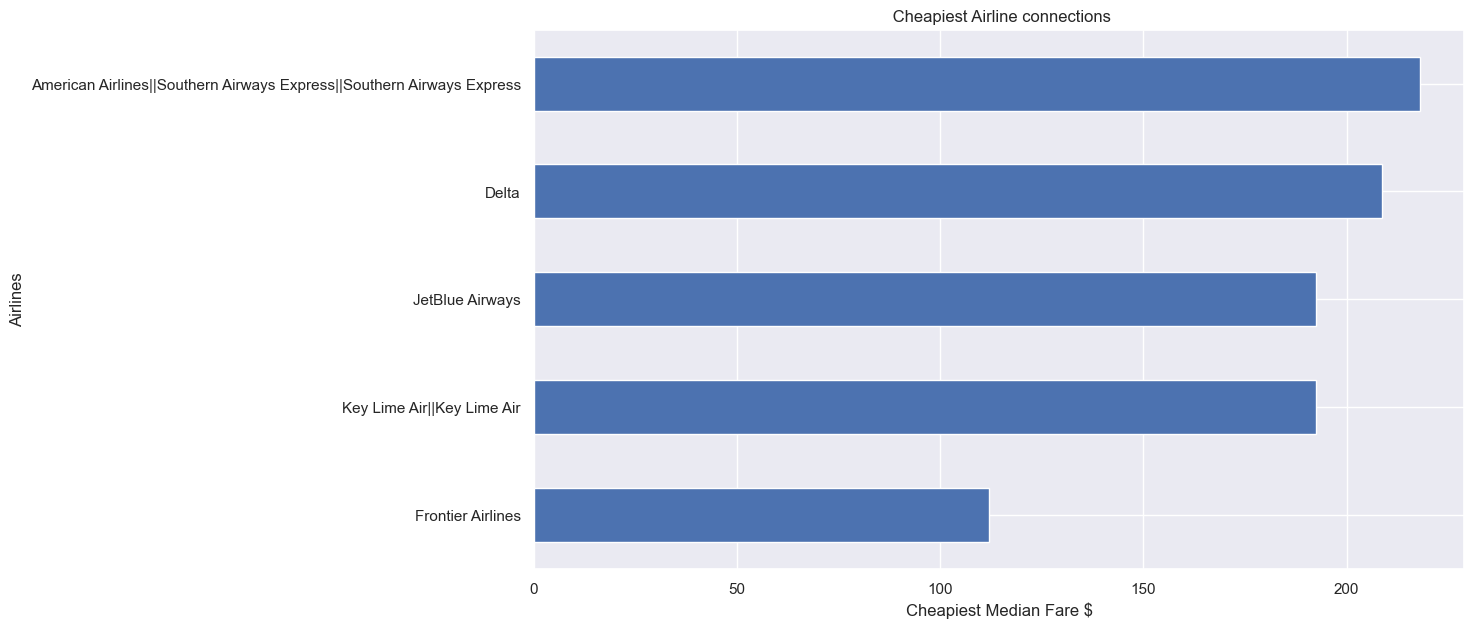

In [42]:


# Step 5: Explode the list of airline names to split into individual rows (without creating unnecessary duplicates)
# Here, the adjustment is done before the split, so we don't explode and aggregate directly
airline_fare_stats = (
    df.groupby('segmentsAirlineName', observed=True)['totalFare']
    .agg(['mean', 'median','min', 'max', 'count'])
    .sort_values(by='median', ascending=True)
)
plt.figure(figsize=(12,7))
airline_fare_stats['median'].head().plot(kind='barh')
plt.ylabel('Airlines')
plt.xlabel('Cheapiest Median Fare $')
plt.title(' Cheapiest Airline connections')





i decided to keep those as they are because you cannot split the fare among all of segment airlinenames because , you don't know what each airline company shall get from each fare we have? if you know then tell us, but if you don't know then use the whole segment in your analysis

### Expensive Destinations

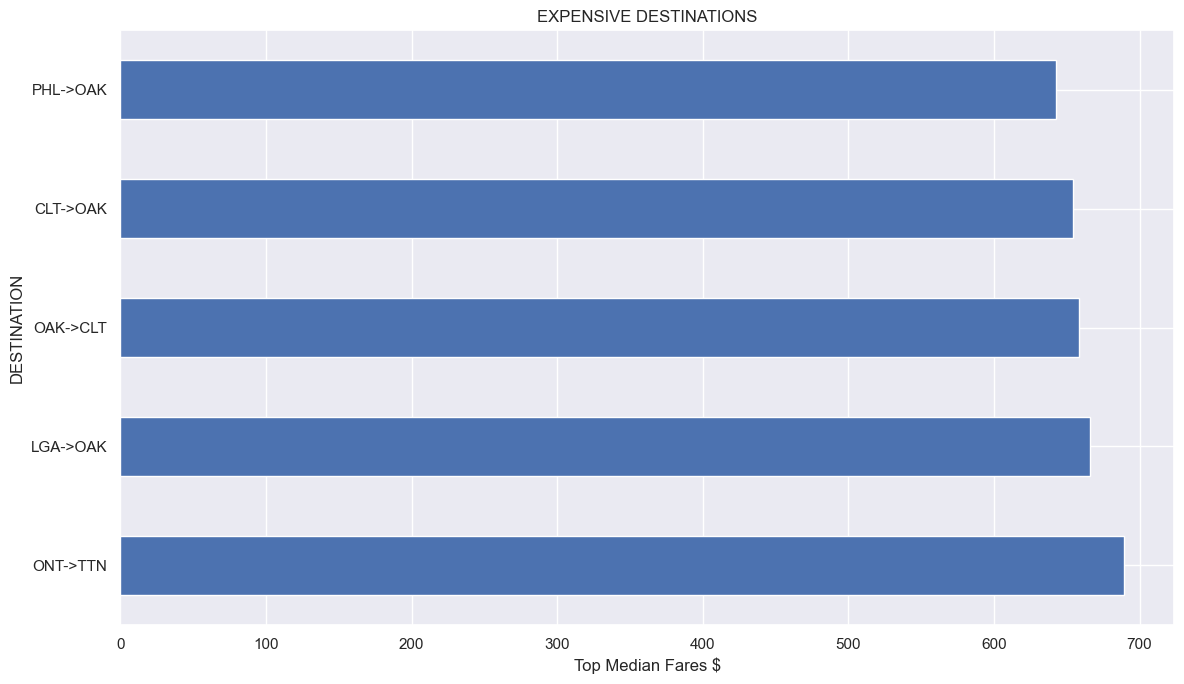

In [43]:

plt.figure(figsize=(12,7))
airline_fare_stats = (
    df.groupby('start_END_Destination', observed=True)['totalFare']
    .agg(['mean', 'median','min', 'max', 'count'])
    .sort_values(by='median', ascending=False)
)
airline_fare_stats['median'].head().plot(kind='barh')
plt.ylabel('DESTINATION')
plt.xlabel('Top Median Fares $')
plt.title("EXPENSIVE DESTINATIONS")
plt.tight_layout()


# Define the directory and file path
folder = "Graphs"
file_path = os.path.join(folder, "topMedian-Start-to-End.png")

# Create the directory if it does not exist
os.makedirs(folder, exist_ok=True)

plt.savefig(file_path, dpi=300, bbox_inches="tight")


### CHEAPEST DESTINATIONS

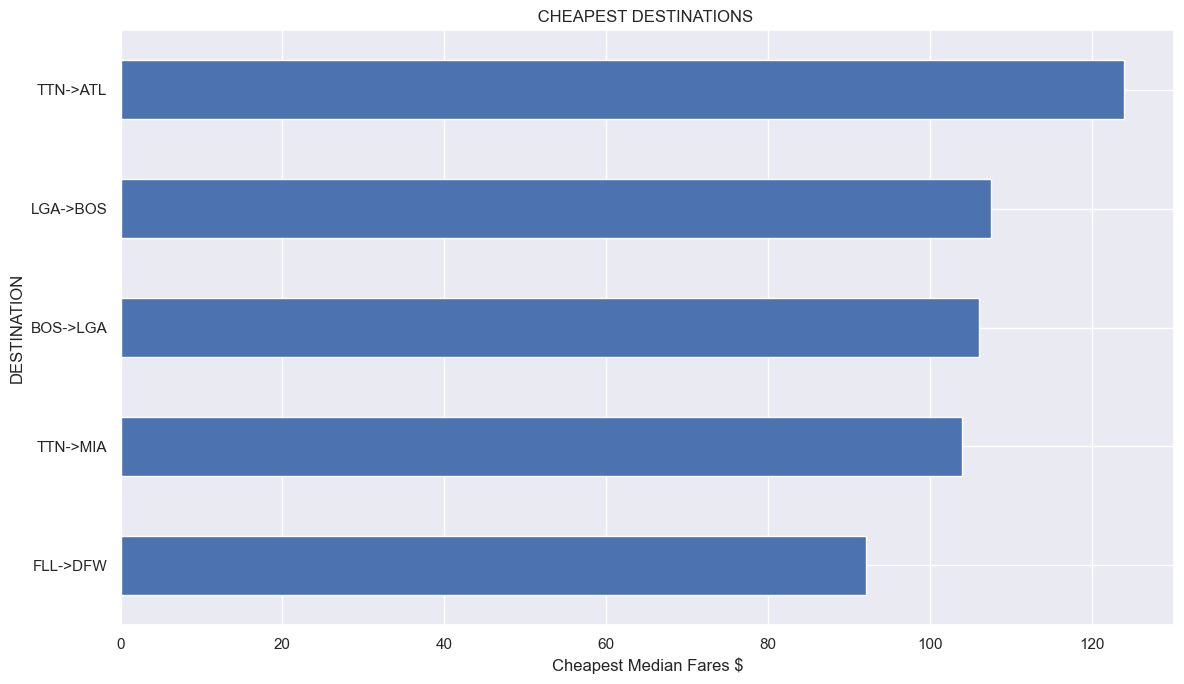

In [44]:

plt.figure(figsize=(12,7))
airline_fare_stats = (
    df.groupby('start_END_Destination', observed=True)['totalFare']
    .agg(['mean', 'median','min', 'max', 'count'])
    .sort_values(by='median', ascending=True)
)
airline_fare_stats['median'].head().plot(kind='barh')
plt.ylabel('DESTINATION')
plt.xlabel('Cheapest Median Fares $')
plt.title(" CHEAPEST DESTINATIONS  ")
plt.tight_layout()


# Define the directory and file path
folder = "Graphs"
file_path = os.path.join(folder, "cheapMedianFare-Start-to-End.png")

# Create the directory if it does not exist
os.makedirs(folder, exist_ok=True)

plt.savefig(file_path, dpi=300, bbox_inches="tight")



- we could dig deep to see how far is the TTN to ATL, why this cheap ? 
- same for others , are they 3 departures or 2 or non ? these kinds of questions 